(24539, 30, 30, 3) (24539,)
(19631, 30, 30, 3) (4908, 30, 30, 3) (19631,) (4908,)
Epoch 1/20
614/614 [==============================] - 30s 47ms/step - loss: 1.9781 - accuracy: 0.5615 - val_loss: 0.4883 - val_accuracy: 0.8788
Epoch 2/20
614/614 [==============================] - 31s 51ms/step - loss: 0.6180 - accuracy: 0.8269 - val_loss: 0.2098 - val_accuracy: 0.9515
Epoch 3/20
614/614 [==============================] - 32s 52ms/step - loss: 0.3757 - accuracy: 0.8941 - val_loss: 0.1329 - val_accuracy: 0.9639
Epoch 4/20
614/614 [==============================] - 31s 51ms/step - loss: 0.2877 - accuracy: 0.9192 - val_loss: 0.0813 - val_accuracy: 0.9808
Epoch 5/20
614/614 [==============================] - 103s 168ms/step - loss: 0.2571 - accuracy: 0.9291 - val_loss: 0.0868 - val_accuracy: 0.9768
Epoch 6/20
614/614 [==============================] - 192s 313ms/step - loss: 0.2019 - accuracy: 0.9439 - val_loss: 0.1226 - val_accuracy: 0.9711
Epoch 7/20
614/614 [==============================

c:\Users\kiran\OneDrive\Desktop\Traffic Project\gui_env310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


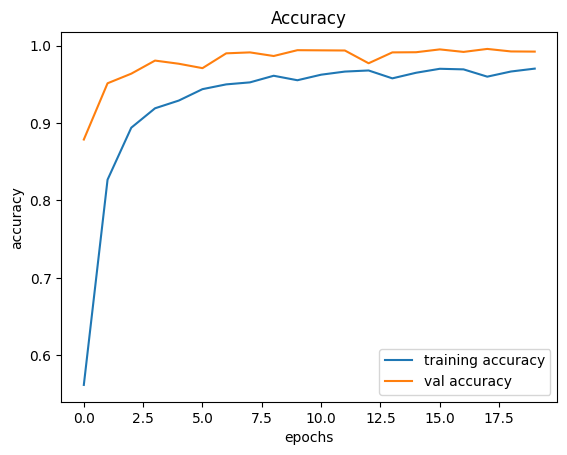

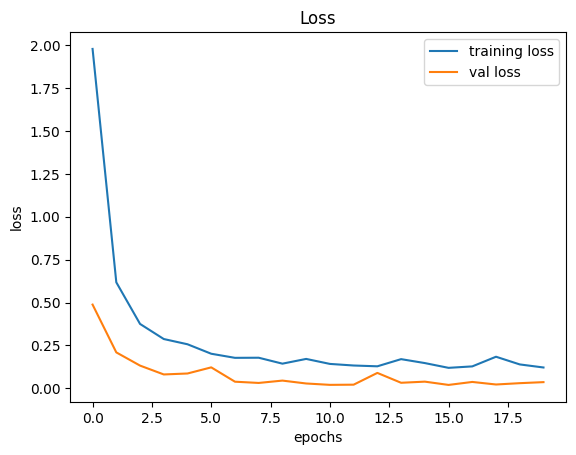

395/395 [==============================] - 5s 11ms/step
0.5912114014251781


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import gtts
import playsound

data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(0,8):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
for i in range(10,classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)
#print(0.9590736342042755)
# pred = model.predict_classes(X_test)
pred_x=model.predict([X_test])
classes_x=np.argmax(pred_x,axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x))


